# PHYS 5640 - HW 02
## Steven Stetzler (sgs7cr)

## Monte Carlo Simulation of Kinks in the World-Line Formulation


### The Problem
We consider the problem of a single spin-1/2 particle in a transverse magnetic field of strength $H$. The energy of this particle is described by the Hamiltonian $\hat{\mathcal{H}} = -H \hat{\sigma}_x$ where $\hat{\sigma}_x  =
\begin{pmatrix}
     0 & 1 \\
     1 & 0
\end{pmatrix}
$ is the Pauli matrix. To examine the physical properties of this system, we compute **partition function** of the system, which can be computed universally as $Z = Tr(e^{-\beta \hat{\mathcal{H}}})$ where $\beta$ is the inverse temperature $1 / T$. By choosing a complete basis $\lvert n \rangle$ to represent our system, we can express the partition function as $Z = \sum_n \langle n \rvert e^{-\beta \hat{\mathcal{H}}} \lvert n \rangle$. This holds for any complete basis of the Hilbert space describing our system.

### Exact Solution
A convenient basis in which to solve the system is to use the eigenstates of the hamiltonian $\lvert \rightarrow \rangle$ and $\lvert \leftarrow \rangle$. This allows us to express $Z$ as:

$$
Z = \langle \leftarrow \rvert e^{-\beta \hat{\mathcal{H}}} \rvert \leftarrow \rangle + \langle \rightarrow \rvert e^{-\beta \hat{\mathcal{H}}} \rvert \rightarrow \rangle.
$$

Since $\hat{\mathcal{H}}$ is **diagonalized** in this basis, then we can replace $\hat{\mathcal{H}}$ with $\lambda$ in the exponentials above where $\lambda$ is the **eigenvalue** of each of the basis **eigenstates**. For the state $\lvert \rightarrow \rangle = 
\begin{pmatrix}
1 \\
1
\end{pmatrix}
$, the corresponding eigenvalue is $\lambda = -H$ and for the state $\lvert \leftarrow \rangle = 
\begin{pmatrix}
-1 \\
1
\end{pmatrix}
$, the corresponding eigenvalue is $\lambda = H$, yielding

$$
Z = \langle \leftarrow \rvert e^{-\beta \hat{\mathcal{H}}} \rvert \leftarrow \rangle + \langle \rightarrow \rvert e^{-\beta \hat{\mathcal{H}}} \rvert \rightarrow \rangle = e^{- \beta H } + e^{\beta H } = 2\text{cosh}(\beta H).
$$

And thus we have

$$
Z = \fbox{ $2\text{cosh}(\beta H)$ }
$$

The average energy of the spin can be computed simply as $ \langle E \rangle = \sum_n E(n) P(n) $ where $E(n)$ is the energy of the $n$ state and $P(n) = e^{-\beta E_n} / Z$ is the probability of finding the particle in the $n$ state, a statistical weight computed using the Boltzmann factor. $E_n$ is computed straight forwardly as $E_n = \langle n \rvert \hat{\mathcal{H}} \lvert n \rangle$. Again in the $\lvert \rightarrow \rangle$ and $\lvert \leftarrow \rangle$ basis, this is computed as

$$
\langle E \rangle = \frac{-H e^{\beta H} + H e^{- \beta H} }{Z} = \frac{-2H \text{sinh}(\beta H) }{2 \text{cosh}(\beta H)} = -H \text{tanh}(\beta H).
$$

And thus we have

$$
\langle E \rangle = \fbox{ $-H \text{tanh}(\beta H)$ }
$$

### World-Line Formulation

A less convenient basis to use are the states $\lvert \uparrow \rangle = \lvert + \rangle$ and $\lvert \downarrow \rangle = \lvert - \rangle$, which are the eigenstates of the $\hat{\sigma}_z$ Pauli matrix. The path-integral formulation can still be used to solve this problem however in this inconvenient basis in which the hamilitonian is not diagonalized. Using this basis, we can express the partition function as 

\begin{align*}
Z &= \sum_{\sigma = \pm} \langle \sigma \rvert e^{-\beta H} \lvert \sigma \rangle = \sum_{\sigma_1} \sum_{\sigma_2} ... \sum_{\sigma_N} \langle \sigma_1 \rvert e^{- \Delta \tau H} \lvert \sigma_2 \rangle \langle \sigma_2 \rvert e^{- \Delta \tau H} \lvert \sigma_3 \rangle ... \langle \sigma_N \rvert e^{- \Delta \tau H} \lvert \sigma_1 \rangle \\
 &= \sum_{C \equiv \{ \sigma(\tau) \} } w(C) = \sum_{C = \{ \tau_1, \tau_2, ..., \tau_n \} } w(C).
\end{align*}

Here, $C = \{ \sigma(\tau) \}$ is the collection of all possible trajectories of an Ising variable (the world-lines). Since the Ising variable is $\sigma = \pm 1$, $C$ can be equivilently represented as a collectionn of "kinks" $C = \{ \tau_1, \tau_2, ..., \tau_n \}$ where $\tau_i$ is the position at which the variable changed signs (a transition from $1$ to $-1$ or vice-versa). Now, simulation of this system and its properties comes down to sampling from possible configurations of kinks in the world-lines. To enable this, we must have a way to sample from $C$. The time separating two kinks is a random variable described by an exponential PDF $p(t) = \text{exp}(-t / \xi) / \xi$ where $\xi = 1 / H$ is the average distance between the kinks. The fact that $\xi$ is the average distance between kinks can be shown through direct computation:

$$
\langle t \rangle = \int_0^\infty t p(t) dt = \int_0^\infty \frac{t}{\xi} e^{-\frac{t}{\xi}} dt = - t e^{-\frac{t}{\xi}} \Big\vert_0^\infty + \int_0^\infty e^{- \frac{t}{\xi}} = -\xi (0 - 1) = \xi
$$

The functions below `sample_num_kinks()` and `plot_kinks()` take the inverse temperature $\beta = 1/T$ and the average separation between kinks $\xi = 1 / H$ as input and produce and plot (respectively) a kink-configuration. To obey the boundary conditions of our system, that $\sigma(0) = \sigma(\beta)$, in `sample_num_kinks()`, we discard all kink configurations with an odd number of kinks.

An image of one possible kink configuration is shown below for $\beta = 0.25$ and $\xi = 1$.

![](ising_trajectory.png)

We can also explore the PDF over the number of kinks at any given temperature $T$ and field strength $H$, which is implemented in the function `sim_ising()`. The number of kinks is a Poisson random variable with probability distribution $\pi_{\text{Poisson}}(n) / 2 = \frac{\lambda^n e^{-\lambda}}{2 n!}$ where $\lambda = \beta / \xi = \beta H$ is the average number of kinks without the even-number constraint listed above. The Poisson probability distribution is divided by $2$ to account for the fact that we only include configurations with an even number of kinks. Monte Carlo estimates for this PDF were found by generating $500,000$ configurations of kinks for temperatures $T = 0.05, 0.10, $ and $0.20$ with a field strength of $H = 1$. These Monte Carlo estimates along with the analytic form overlayed are found and displayed in the image below.

![](pdf.png)

The average energy can also be computed as

$$
E = -\frac{1}{\beta} \langle n \rangle,
$$

where $\langle n \rangle$ is the average number of kinks. We computed the average energy above for $500,000$ configurations of kinks for temperatures in a the range $T \in (0, 5]$ with a field strength of $H = 1$. The Monte Carlo estimate for the energy along with the analytic form, derived above, is shown in the image below.

![](energy.png)

Below this introduction, you will find a Python implementation for Monte Carlo studies of this system.

Useful imports. We use the `numpy` and `matplotlib` packages, which should be installed before running.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from math import log, exp, gamma, tanh
from matplotlib import rcParams
%matplotlib inline

We update the plotting options to make our graphs look nicer.

In [2]:
rcParams.update({'xtick.major.pad': '7.0'})
rcParams.update({'xtick.major.size': '7.5'})
rcParams.update({'xtick.major.width': '1.5'})
rcParams.update({'xtick.minor.pad': '7.0'})
rcParams.update({'xtick.minor.size': '3.5'})
rcParams.update({'xtick.minor.width': '1.0'})
rcParams.update({'ytick.major.pad': '7.0'})
rcParams.update({'ytick.major.size': '7.5'})
rcParams.update({'ytick.major.width': '1.5'})
rcParams.update({'ytick.minor.pad': '7.0'})
rcParams.update({'ytick.minor.size': '3.5'})
rcParams.update({'ytick.minor.width': '1.0'})
rcParams.update({'font.size': 22})
rcParams.update({'font.family' : 'Times New Roman'})
rcParams.update({'mathtext.fontset' : 'stix'})
rcParams.update({'figure.figsize' : [14, 10]})

`sample_num_kink()` takes as an argument the inverse temperature $\beta = 1 / T$ and $\xi = 1 / H$ the average number of kinks. We generate a number of kinks within the range $\tau \in [0, beta]$ according to the exponential probability distribution function $p(\tau) = \frac{\text{exp}(-\tau / \xi)}{\xi}$.

In [3]:
def sample_num_kinks(beta, xi):
    t_end = - xi * log(np.random.uniform())
    n = 0
    t_n = []
    while t_end < beta:
        n = n + 1
        t_n.append(t_end)
        t = - xi * log(np.random.uniform())
        t_end = t_end + t
    return t_n

`sample_kink_dist` takes as arguments $N$, number of number draws from the kink configuration distribution, which is specified by the two parameters $\beta$ and $\xi$. We only include kink configurations that are even in order to obey the periodic boundary conditions of our system.

In [4]:
def sample_kink_dist(N, beta, xi):
    kink_sims = []
    
    while len(kink_sims) < N:
        new_sim = sample_num_kinks(beta, xi)
        if len(new_sim) % 2 == 0:
            kink_sims.append(new_sim)
            
    return kink_sims

`sim_ising()` takes as arguments the same arguments as for `sample_kink_dist()`. This function computes an estimate for the kink probability distribution function at a specific $\beta$ and $\xi$. It also returns the average number of kinks at a specific $\beta$ and $\xi$.

In [5]:
def sim_ising(N, beta, xi):
    kink_locations = sample_kink_dist(N, beta, xi)
    
    num_kinks = [len(k) for k in kink_locations]
    # We set a maximum of 40, just for plotting reasons.
    max_kinks = max(max(num_kinks), 41)
    possible_kinks = np.arange(0, max_kinks, 2)
    
    # Compute the number of configurations that had i kinks, where i is between 0 and the maximum number of kinks, which 
    # is chosen to be at minimum 40 for plotting
    num_kinks_even = [len([a for a in num_kinks if a == i]) for i in possible_kinks]
    kinks_pdf = [l / (2 * sum(num_kinks_even)) for l in num_kinks_even] # Normalize
    
    avg_num_kinks = np.average(num_kinks)
    
    return possible_kinks, kinks_pdf, avg_num_kinks

`plot_kinks()` will plot a single possible trajectory $\sigma(\tau)$ of an Ising variable given a specific value for $\beta$ and $\xi$. This function is useful for exploring how the configuration space changes at different $\beta$ and $\xi$.

In [6]:
def plot_kinks(beta, xi):
    t_n = sample_num_kinks(beta, xi)
    
    x = np.linspace(0, beta, 1000)
    y = np.ones(len(x))
    
    for i, t in enumerate(t_n):
        if i == 0:
            t_prev = 0
        else:
            t_prev = t_n[i - 1]
            
        if i % 2 == 0:
            y[np.where((x < t) & (x > t_prev))] = 1
        else:
            y[np.where((x < t) & (x > t_prev))] = -1
    
    plt.plot(x, y)
    plt.yticks([-1, 0, 1])
    
    plt.xlabel(r"$\tau$", fontsize=30)
    plt.ylabel(r"$\sigma(\tau)$", rotation=0, labelpad=20, fontsize=30)
    
    plt.title("Trajectory of An Ising Variable")
    
    plt.show()

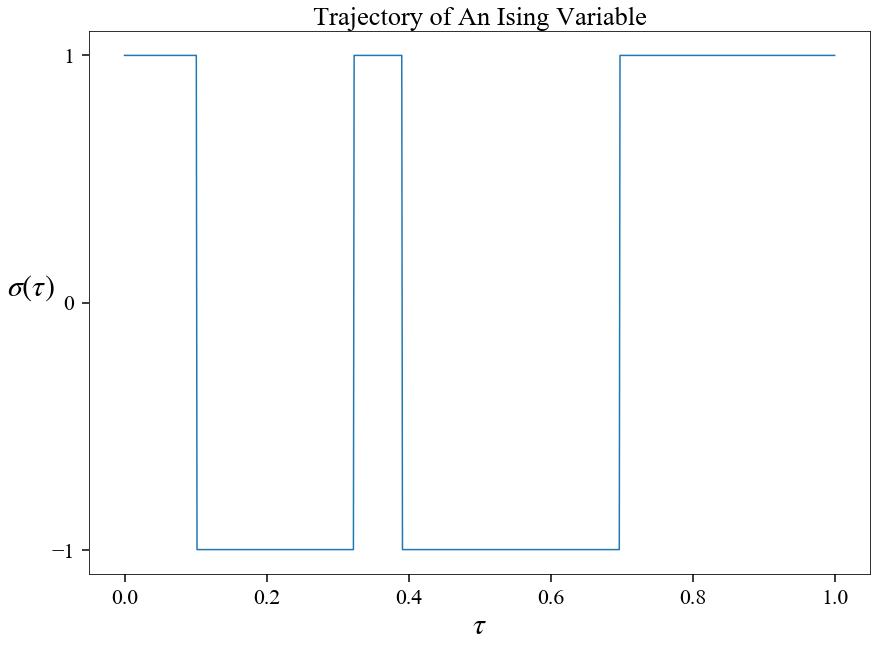

In [7]:
beta = 1
xi = 0.25

plot_kinks(beta, xi)

Here, we find the kink configuration probability distribution functions (PDFs) for $\xi = 1$ and $T = 0.20, 0.10, \text{and}~0.05$, or equivilanty $\beta = 5, 10, \text{and}~20$. Each PDF is estimated using $500,000$ draws from the distribution.

In [8]:
xi = 1
N = 500000
Ts = [0.20, 0.10, 0.05]

data = []
for T in Ts:
    beta = 1 / T
    possible_kinks, kinks_pdf, _ = sim_ising(N, beta, xi)
    data.append((possible_kinks, kinks_pdf))

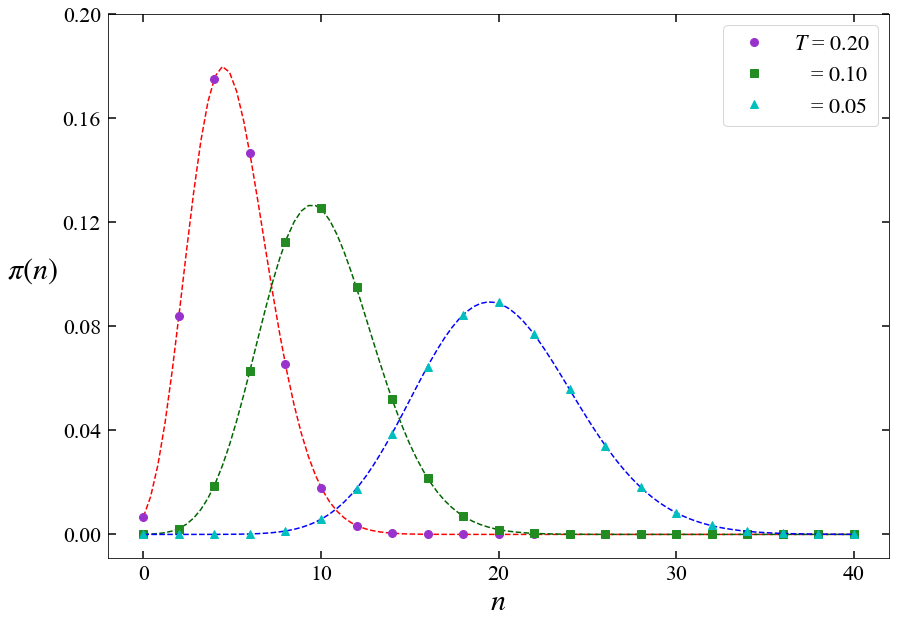

In [9]:
f, ax = plt.subplots(figsize=(14, 10))

colors = [('darkorchid', 'red'), ('forestgreen', 'darkgreen'), ('c', 'blue')]
markers = ['o', 's', '^']
labels = [r'$T$ = ${:0.2f}$', r"   = ${:0.2f}$", r"   = ${:0.2f}$"]

for d, T, color, marker, label in zip(data, Ts, colors, markers, labels):
    beta = 1 / T

    c_m, c_l = color
    
    l = beta / xi
    x = np.linspace(0, 40, 100)
    model = [l**n * exp(-l) / gamma(n + 1) for n in x] 
    
    ax.plot(x, model, color=c_l, linestyle='--')
    
    possible_kinks, kinks_pdf = d
    
    ax.plot(possible_kinks, kinks_pdf, linestyle="None", marker=marker, markersize=8, color=c_m, label=label.format(T))
    
ax.set_xlabel(r"$n$", fontsize=30)
ax.set_ylabel(r"$\pi(n)$", rotation=0, labelpad=30, fontsize=30)

ax.set_yticks(np.linspace(0, 0.2, 6))
ax.set_xticks(np.linspace(0, 40, 5))

ax.get_xaxis().set_tick_params(direction='in')
ax.get_yaxis().set_tick_params(direction='in')
ax.get_xaxis().set_tick_params(top='on')
ax.get_yaxis().set_tick_params(right='on')

plt.legend()
plt.show()

Here, we compute the average number of kinks $\langle n \rangle$ for $\xi = 1$ and $T \in (0, 5]$. We can then compute the energy of this system as $E = \langle n \rangle / \beta$. We plot $\langle n \rangle$. We plot $E$ as a function of $T$.

In [10]:
xi = 1
N = 500000

energies = []
temp_range = np.linspace(0.1, 5, 100)
for T in temp_range:
    beta = 1 / T
    
    _, _, avg_num_kinks = sim_ising(N, beta, xi)
        
    energy = - T * avg_num_kinks
    energies.append(energy)

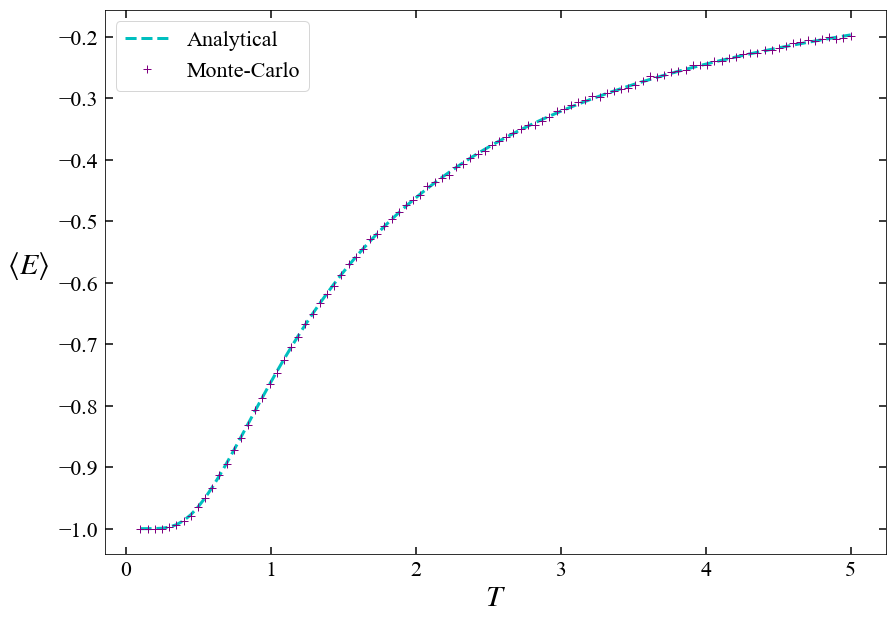

In [11]:
f, ax = plt.subplots(figsize=(14, 10))

model = [-1/xi * tanh(xi / T) for T in temp_range]
ax.plot(temp_range, model, linewidth=3, color='c', linestyle="--", label='Analytical')
ax.plot(temp_range, energies, linestyle="None", marker="+", markersize=8, color='purple', label='Monte-Carlo')

ax.set_ylabel(r"$\langle E \rangle$", labelpad=30, rotation=0, fontsize=30)
ax.set_xlabel(r"$T$", fontsize=30)

ax.get_xaxis().set_tick_params(direction='in')
ax.get_yaxis().set_tick_params(direction='in')
ax.get_xaxis().set_tick_params(top='on')
ax.get_yaxis().set_tick_params(right='on')

plt.legend()
plt.show()